Verificar como fazer download do dataset do github e exluir arquivos que não são importantes, por fim, será necessário salvar os arquivos em um repo tipo o huggingface

In [30]:
import os
import glob
import pandas as pd
import numpy as np

In [31]:
path = os.path.join(os.pardir, "datasets", "5G-production-dataset")


In [32]:
files = glob.glob(path + "/**/*.csv", recursive=True)

In [33]:
listdf = []
for i, file in enumerate(files):
  file = file.replace("\\","/")
  df = pd.read_csv(file)
  folders_name = file.split('/')[3:-1]

  # It will identify if the user is static or moving.
  df["Mobility_Pattern"] = folders_name[1]
  folders_name.pop(1)

  # It will identify if the user is downloading or watching some streaming.
  df["User_Activity"] = ' '.join(folders_name)

  # It will identify if the user is downloading or watching some streaming.
  df["Log_Number"] = i

  listdf.append(df)

del df

In [34]:
df = pd.concat(listdf, axis=0, ignore_index=True)

In [35]:
df

,Timestamp,Longitude,Latitude,Speed,Operatorname,CellID,NetworkMode,RSRP,RSRQ,SNR,...,PINGLOSS,CELLHEX,NODEHEX,LACHEX,RAWCELLID,NRxRSRP,NRxRSRQ,Mobility_Pattern,User_Activity,Log_Number
0,2019.11.28_07.27.57,-8.388193,51.935608,0,B,12,5G,-102,-10,8.0,...,-,C,A81B,9CBA,11016972,-102.0,-1.0,Driving,Amazon_Prime animated-AdventureTime,0
1,2019.11.28_07.27.57,-8.388269,51.935542,1,B,12,5G,-102,-10,8.0,...,-,C,A81B,9CBA,11016972,-102.0,-1.0,Driving,Amazon_Prime animated-AdventureTime,0
2,2019.11.28_07.27.58,-8.388269,51.935542,1,B,12,5G,-102,-10,8.0,...,-,C,A81B,9CBA,11016972,-102.0,-1.0,Driving,Amazon_Prime animated-AdventureTime,0
3,2019.11.28_07.27.59,-8.388269,51.935542,1,B,12,5G,-102,-10,3.0,...,-,C,A81B,9CBA,11016972,-101.0,-3.0,Driving,Amazon_Prime animated-AdventureTime,0
4,2019.11.28_07.28.00,-8.388269,51.935542,1,B,12,5G,-102,-10,3.0,...,-,C,A81B,9CBA,11016972,-101.0,-3.0,Driving,Amazon_Prime animated-AdventureTime,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188706,2019.12.16_13.36.25,-8.394601,51.886139,0,B,11,5G,-101,-13,-7.0,...,-,B,A4DF,9CBA,10805003,-103.0,-20.0,Static,Netflix Season3-StrangerThings,82
188707,2019.12.16_13.36.27,-8.394601,51.886139,0,B,11,5G,-101,-13,-7.0,...,-,B,A4DF,9CBA,10805003,-103.0,-20.0,Static,Netflix Season3-StrangerThings,82
188708,2019.12.16_13.36.28,-8.394601,51.886139,0,B,11,5G,-103,-12,5.0,...,-,B,A4DF,9CBA,10805003,-105.0,-19.0,Static,Netflix Season3-StrangerThings,82
188709,2019.12.16_13.36.29,-8.394601,51.886139,0,B,11,5G,-103,-12,5.0,...,-,B,A4DF,9CBA,10805003,-105.0,-19.0,Static,Netflix Season3-StrangerThings,82


In [36]:
# Remove unused columns
cleaned = df.drop(['Latitude','Longitude','Operatorname','CellID','PINGAVG','PINGMIN','PINGMAX','PINGSTDEV','PINGLOSS','CELLHEX','NODEHEX','LACHEX','RAWCELLID','NRxRSRP','NRxRSRQ'],axis=1)

In [37]:
# Convert unkown string to datetime64
# add TZ +1000 for Dublin, Ireland UTC
cleaned["Timestamp"] = cleaned["Timestamp"].apply(lambda row : row[:9].replace(".", "-") + row[9:].replace(".", ":").replace("_", " ") ).astype("datetime64[ns]")

In [38]:
cleaned.count()

Timestamp           188711
Speed               188711
NetworkMode         188711
RSRP                188711
RSRQ                188711
SNR                 188711
CQI                 188711
RSSI                188711
DL_bitrate          188711
UL_bitrate          188711
State               188711
Mobility_Pattern    188711
User_Activity       188711
Log_Number          188711
dtype: int64

In [39]:
# Remove values when state is idle and when bitrate falls below threshold
# cleaned = cleaned[(cleaned.State != 'I') & (cleaned.DL_bitrate > 10)]


In [40]:
cleaned.count()

Timestamp           188711
Speed               188711
NetworkMode         188711
RSRP                188711
RSRQ                188711
SNR                 188711
CQI                 188711
RSSI                188711
DL_bitrate          188711
UL_bitrate          188711
State               188711
Mobility_Pattern    188711
User_Activity       188711
Log_Number          188711
dtype: int64

In [41]:
cleaned.dtypes

Timestamp           datetime64[ns]
Speed                        int64
NetworkMode                 object
RSRP                         int64
RSRQ                        object
SNR                         object
CQI                         object
RSSI                        object
DL_bitrate                   int64
UL_bitrate                   int64
State                       object
Mobility_Pattern            object
User_Activity               object
Log_Number                   int64
dtype: object

In [42]:
# Rename '-' to NaN values
cleaned[["RSRQ","SNR","CQI", "RSSI"]] = cleaned[["RSRQ","SNR","CQI", "RSSI"]].replace('-', np.nan)


In [43]:
# Change objects columns to int64 dtype
#cleaned[["RSRQ","SNR","CQI", "RSSI"]] = cleaned[["RSRQ","SNR","CQI", "RSSI"]].astype(float).astype('Int64')
cleaned[["RSRP","RSRQ","SNR","CQI", "RSSI"]] = cleaned[["RSRP","RSRQ","SNR","CQI", "RSSI"]].astype(float)

In [44]:
cleaned.dtypes

Timestamp           datetime64[ns]
Speed                        int64
NetworkMode                 object
RSRP                       float64
RSRQ                       float64
SNR                        float64
CQI                        float64
RSSI                       float64
DL_bitrate                   int64
UL_bitrate                   int64
State                       object
Mobility_Pattern            object
User_Activity               object
Log_Number                   int64
dtype: object

In [45]:
# Show sum of nan values in all columns
cleaned.isna().sum()

Timestamp               0
Speed                   0
NetworkMode             0
RSRP                    0
RSRQ                 3634
SNR                 17096
CQI                 17097
RSSI                53573
DL_bitrate              0
UL_bitrate              0
State                   0
Mobility_Pattern        0
User_Activity           0
Log_Number              0
dtype: int64

In [46]:
cleaned[cleaned['RSRP'].isna()].Log_Number.unique()

array([], dtype=int64)

In [47]:
cleaned[cleaned['RSRQ'].isna()].Log_Number.unique()

array([ 5, 10, 11, 20, 22, 23, 25, 38, 39, 40, 41, 42, 43, 44, 46, 65, 71,
       73, 79], dtype=int64)

In [48]:
cleaned[cleaned['SNR'].isna()].Log_Number.unique()

array([ 0,  2,  3,  5,  6, 10, 11, 14, 16, 17, 18, 19, 20, 22, 23, 25, 29,
       31, 32, 38, 39, 40, 42, 43, 44, 50, 51, 53, 55, 56, 59, 62, 64, 65,
       70, 71, 72, 73, 79], dtype=int64)

In [49]:
cleaned[cleaned['CQI'].isna()].Log_Number.unique()

array([ 0,  2,  3,  5,  6, 10, 11, 14, 16, 17, 18, 19, 20, 22, 23, 25, 29,
       31, 32, 38, 39, 40, 42, 43, 44, 50, 51, 53, 55, 56, 59, 62, 64, 65,
       70, 71, 72, 73, 79], dtype=int64)

In [50]:
cleaned[cleaned['RSSI'].isna()].Log_Number.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 38, 39, 40, 42, 43, 44, 45, 50, 51, 52, 53, 54, 55, 56, 57, 58,
       59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75,
       76, 77, 78, 79, 80, 81, 82], dtype=int64)

# Time as index and remove duplicated

In [51]:
# Configurar a coluna de data/hora como índice
cleaned = cleaned.set_index('Timestamp')


In [52]:
# Remover índices duplicados
cleaned = cleaned[~cleaned.index.duplicated(keep='first')]

In [53]:
cleaned

,Speed,NetworkMode,RSRP,RSRQ,SNR,CQI,RSSI,DL_bitrate,UL_bitrate,State,Mobility_Pattern,User_Activity,Log_Number
Timestamp,,,,,,,,,,,,,
2019-11-28 07:27:57,0,5G,-102.0,-10.0,8.0,14.0,NaN,0,0,I,Driving,Amazon_Prime animated-AdventureTime,0
2019-11-28 07:27:58,1,5G,-102.0,-10.0,8.0,14.0,NaN,0,2,D,Driving,Amazon_Prime animated-AdventureTime,0
2019-11-28 07:27:59,1,5G,-102.0,-10.0,3.0,14.0,NaN,3,2,D,Driving,Amazon_Prime animated-AdventureTime,0
2019-11-28 07:28:00,1,5G,-102.0,-10.0,3.0,14.0,NaN,9,13,D,Driving,Amazon_Prime animated-AdventureTime,0
2019-11-28 07:28:01,1,5G,-103.0,-11.0,6.0,14.0,NaN,926,93,D,Driving,Amazon_Prime animated-AdventureTime,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-16 13:36:25,0,5G,-101.0,-13.0,-7.0,10.0,-85.0,1,69,D,Static,Netflix Season3-StrangerThings,82
2019-12-16 13:36:27,0,5G,-101.0,-13.0,-7.0,11.0,-88.0,0,11,D,Static,Netflix Season3-StrangerThings,82
2019-12-16 13:36:28,0,5G,-103.0,-12.0,5.0,11.0,-88.0,15,12,D,Static,Netflix Season3-StrangerThings,82


In [150]:
cleaned.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 180743 entries, 2019-11-28 07:27:57 to 2019-12-16 13:36:30
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Speed             180743 non-null  int64  
 1   NetworkMode       180743 non-null  object 
 2   RSRP              180743 non-null  float64
 3   RSRQ              177518 non-null  float64
 4   SNR               164739 non-null  float64
 5   CQI               164738 non-null  float64
 6   RSSI              128672 non-null  float64
 7   DL_bitrate        180743 non-null  int64  
 8   UL_bitrate        180743 non-null  int64  
 9   State             180743 non-null  object 
 10  Mobility_Pattern  180743 non-null  object 
 11  User_Activity     180743 non-null  object 
 12  Log_Number        180743 non-null  int64  
dtypes: float64(5), int64(4), object(4)
memory usage: 19.3+ MB


# Handling Missing Data

In [156]:
test_column = "CQI"
test_df = cleaned[cleaned.Log_Number == 4]
display(test_df.info(verbose=False))

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 931 entries, 2019-11-28 17:18:56 to 2019-11-28 17:36:16
Columns: 13 entries, Speed to Log_Number
dtypes: float64(5), int64(4), object(4)
memory usage: 101.8+ KB


None

In [139]:
# test_df = test_df.resample('1S').ffill()

<Axes: xlabel='Timestamp'>

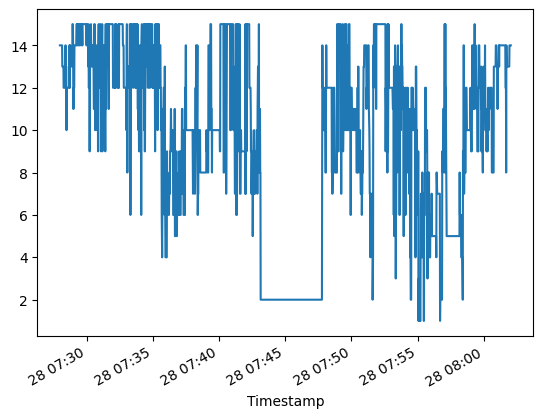

In [140]:
test_df[test_column].ffill().plot()

<Axes: xlabel='Timestamp'>

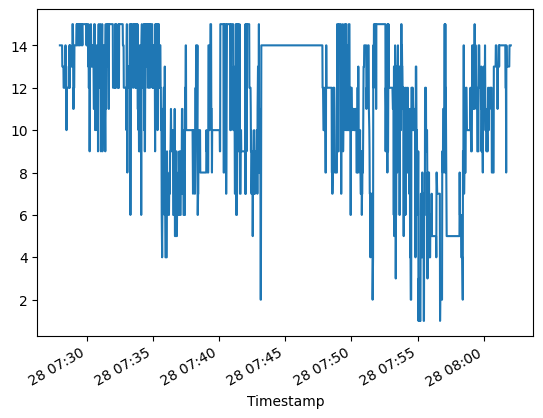

In [141]:
test_df[test_column].bfill().plot()

<Axes: xlabel='Timestamp'>

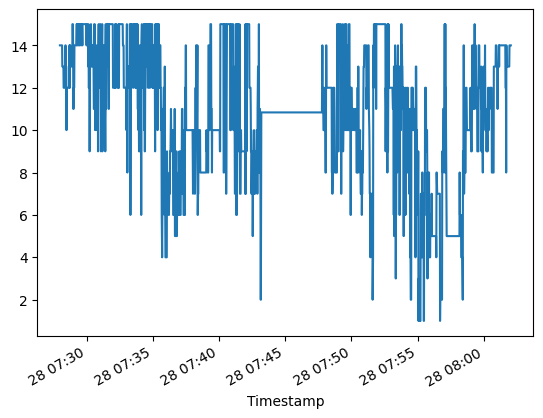

In [142]:
test_df[test_column].fillna(test_df[test_column].mean()).plot()

<Axes: xlabel='Timestamp'>

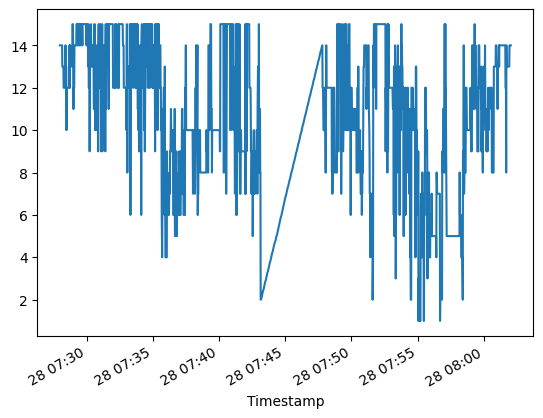

In [143]:
test_df[test_column].interpolate(method="linear").plot()

<Axes: xlabel='Timestamp'>

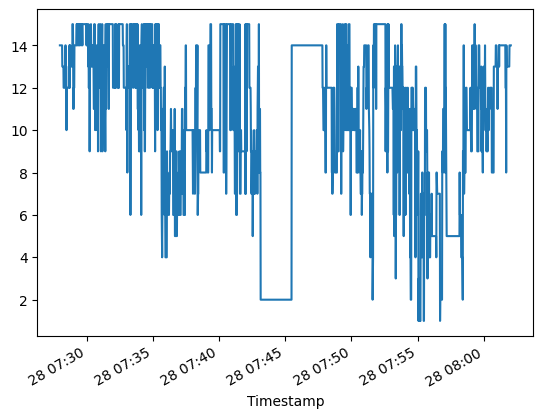

In [144]:
test_df[test_column].interpolate(method="nearest").plot()

<Axes: xlabel='Timestamp'>

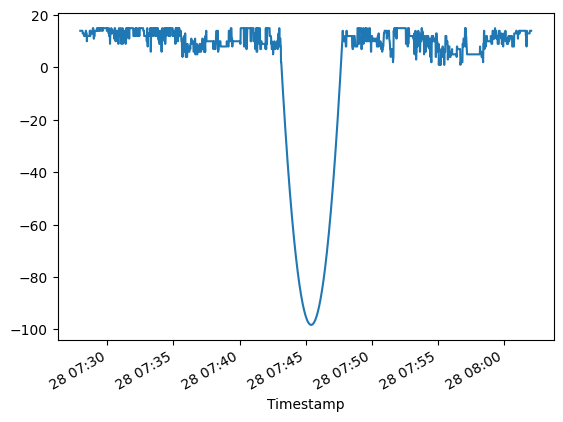

In [145]:
test_df[test_column].interpolate(method="spline", order=2).plot()

<Axes: xlabel='Timestamp'>

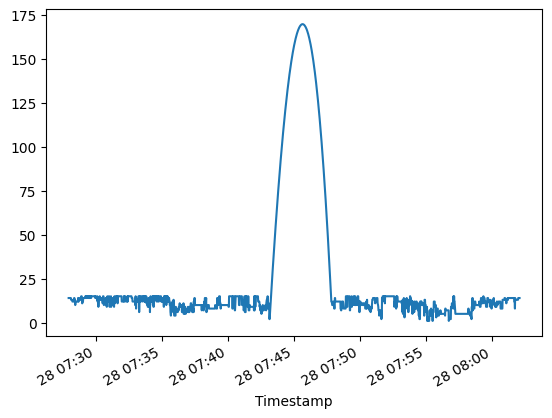

In [146]:
test_df[test_column].interpolate(method="polynomial", order=3).plot()

In [147]:
test_df["shifted"] = test_df["RSRQ"].shift(1)
# display(df[column])
test_df["is_constant"] = test_df["RSRQ"] == test_df["shifted"]

# # Encontrar grupos de constantes
test_df["group"] = test_df["is_constant"].cumsum()

# # Contar a duração de cada grupo
# df['duration'] = df.groupby('group').cumcount() + 1

# # Remover grupos que excedem a duração máxima permitida
# df_filtered = df[(df['is_constant'] == False) | (df['duration'] <= max_duration)]

# # Remover colunas auxiliares
# df_filtered = df_filtered.drop(columns=['shifted', 'is_constant', 'group', 'duration'])

C:\Users\ejs-9\AppData\Local\Temp\ipykernel_10964\862344753.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df["shifted"] = test_df["RSRQ"].shift(1)
C:\Users\ejs-9\AppData\Local\Temp\ipykernel_10964\862344753.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df["is_constant"] = test_df["RSRQ"] == test_df["shifted"]
C:\Users\ejs-9\AppData\Local\Temp\ipykernel_10964\862344753.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

In [148]:
test_df[["Timestamp","RSRQ", "shifted", "is_constant", "group"]]

KeyError: "['Timestamp'] not in index"